## Лабораторна робота 2 - Лінійна та поліноміальна регресія.

By Eugene Pashkovsky, IП-41мп

Одне з безлічі завдань, яким займається сучасна фізика - це пошук матеріалу для виготовлення надпровідника, що працює за кімнатної температури. Крім теоретичних методів є і підхід з боку статистики, який передбачає аналіз бази даних матеріалів для знаходження залежності критичної температури від інших фізичних характеристик. Саме цим Ви і займетеся.

In [339]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

У файлі **data.csv** міститься весь датасет.

In [340]:
data = pd.read_csv('data.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


Разом маємо 21 тисячу рядків і 169 колонок, з яких перші 167 - ознаки, колонка **critical_temp** містить величину, яку треба передбачити. Колонка **material** - містить хімічну формулу матеріалу, її можна відкинути.

Виконаємо попереднє оброблення даних і розіб'ємо на тренувальну та тестову вибірки:

In [341]:
x, y = data.values[:, :-2].astype(np.float32), data.values[:, -2:-1].astype(np.float32)

np.random.seed(1337)
is_train = np.random.uniform(size=(x.shape[0],)) < 0.95

x_train, y_train = x[is_train], y[is_train]
x_test, y_test = x[~is_train], y[~is_train]

print(f'Train samples: {len(x_train)}')
print(f'Test samples: {len(x_test)}')

Train samples: 20210
Test samples: 1053


Реалізуйте методи з позначкою `#TODO` класу PolynomialRegression:

Метод `preprocess` повинен виконувати таке перетворення:
$$
\begin{array}{l}
X=\begin{bmatrix}
x_{i,j}
\end{bmatrix}_{m\times n}\\
preprocess( X) =\begin{bmatrix}
1 & x_{1,1} & \dotsc  & x_{1,1} & x^{2}_{1,1} & \dotsc  & x^{2}_{1,1} & \dotsc  & x^{p}_{1,1} & \dotsc  & x^{p}_{1,1}\\
1 & x_{2,1} & \dotsc  & x_{2,n} & x^{2}_{2,1} & \dotsc  & x^{2}_{2,n} & \dotsc  & x^{p}_{2,1} & \dotsc  & x^{p}_{2,n}\\
\vdots  &  &  &  &  &  &  &  &  &  & \\
1 & x_{m,1} & \dotsc  & x_{m,n} & x^{2}_{m,1} & \dotsc  & x^{2}_{m,n} & \dotsc  & x^{p}_{m,1} & \dotsc  & x^{p}_{m,n}
\end{bmatrix}_{m,N}
\end{array}
$$де p - ступінь полінома (`self.poly_deg` у коді).
Таким чином, preprocess додає поліноміальні ознаки до $X$.

Метод `J` має обчислювати оціночну функцію регресії:
$$
J( \theta ) =MSE( Y,\ h_{\theta }( X)) +\alpha _{1}\sum ^{N}_{i=1}\sum ^{k}_{j=1} |\hat{\theta }_{i,j} |+\alpha _{2}\sum ^{N}_{i=1}\sum ^{k}_{j=1}\hat{\theta }^{2}_{i,j}
$$
Метод `grad` має обчислювати градієнт $\frac{\partial J}{\partial \theta }$:
$$
{\displaystyle \frac{\partial J}{\partial \theta }} =-{\displaystyle \frac{2}{m}} X^{T} (Y-X\theta )+\begin{bmatrix}
0 &  &  & \\
 & 1 &  & \\
 &  & \ddots  & \\
 &  &  & 1
\end{bmatrix} \times ( \alpha _{1} sign(\theta )+2\alpha _{2} \theta )
$$
Метод `moments` має повертати вектор-рядки $\mu,\sigma$ для середнього і стандартного відхилення кожної колонки. Пам'ятайте, що колонку з одиницями не потрібно нормалізувати, тож відповідні середнє і стандартне відхилення для неї вкажіть рівними 0 і 1 відповідно. Можна використовувати функції 
[np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) и [np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Метод `normalize` має виконувати нормалізацію $X$ на основі статистик $\mu,\sigma$, що повернув метод **moments**. Для того щоб уникнути ділення на 0, можете до $\sigma$ додати маленьку величину, наприклад $10^{-8}$.

Метод `get_batch` повинен повертати матриці $X_b, Y_b$ з довільно обраних $b$ елементів вибірки ($b$ у коді - `self.batch_size`).

Метод `fit` виконує оптимізацію $J(\theta)$. Для кращої збіжності реалізуйте алгоритм оптимізації **Momentum**:
$$
\begin{array}{l}
v_t = \gamma v_{t-1} + \alpha\nabla J(\theta_{t-1})\\
\theta_t = \theta_{t-1} - v_t
\end{array}
$$
де $\gamma$ встановіть рівним $0.9$ (можете поекспериментувати з іншими величинами), $v_1=[0]_{N,k}$.

In [342]:
class PolynomialRegression:
    def __init__(
        self,
        alpha1,
        alpha2,
        poly_deg,
        learning_rate,
        batch_size,
        train_steps
    ):
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.poly_deg = poly_deg
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_steps = train_steps
    
    def preprocess(self, x):
        (m, _) = x.shape
        
        p_X = np.array([np.concatenate([np.pow(x[i], p) for p in range(1, self.poly_deg + 1)]) for i in range(m)])
        
        p_X = np.concatenate([[[1] for _ in range(len(p_X))], p_X], axis=1)
        
        return p_X
    
    def normalize(self, x):
        return (x - self.mu) / (self.sigma + 1e-8)
    
    def moments(self, x):
        mu = np.mean(x, axis=0)
        mu[0] = 0
        
        sigma = np.std(x, axis=0)
        sigma[0] = 1
        
        return mu, sigma
    
    def J(self, x, y, theta):
        y_pred = np.array(x @ theta)
        
        L1 = self.alpha1 * np.sum(np.abs(theta))
        L2 = self.alpha2 * np.sum(np.square(theta))
        
        return np.mean(np.square(y - y_pred)) + L2 + L1
    
    def grad(self, x, y, theta):
        h = x @ theta
        
        err = h - y
        
        diag_size = x.shape[1]
        diag_ones = np.zeros(shape=(diag_size, diag_size))
        
        for i in range(1, diag_size):
            diag_ones[i][i] = 1
        
        # print((diag_ones @ (2 * self.alpha2 * theta + self.alpha1 * np.sign(theta))))
        
        return (-2 * (x.transpose() @ err)) / len(x) + diag_ones @ (2 * self.alpha2 * theta + self.alpha1 * np.sign(theta))
    
    def get_batch(self, x, y):
        x_batch = []
        y_batch = []
        
        random_indeces = np.random.randint(0, len(x), size=self.batch_size)
        
        for i in random_indeces:
            x_batch.append(x[i])
            y_batch.append(y[i])
        
        return np.array(x_batch), np.array(y_batch)
    
    def fit(self, x, y):
        x = self.preprocess(x)
        (m, N), (_, k) = x.shape, y.shape
        
        self.mu, self.sigma = self.moments(x)
        
        x = self.normalize(x)
        
        try:
            assert np.allclose(x[:, 1:].mean(axis=0), 0, atol=1e-3)
            assert np.all((np.abs(x[:, 1:].std(axis=0)) < 1e-2) | (np.abs(x[:, 1:].std(axis=0) - 1) < 1e-2))
        except AssertionError as e:
            print('Something wrong with normalization')
            raise e
            
        x_batch, y_batch = self.get_batch(x, y)
        try:
            assert x_batch.shape[0] == self.batch_size
            assert y_batch.shape[0] == self.batch_size
        except AssertionError as e:
            print('Something wrong with get_batch')
            raise e
        
        beta = 0.9
        theta = np.random.randn(N, k) * 0.01
        v_t = np.zeros(shape=(N, k))
        for step in range(self.train_steps):
            x_batch, y_batch = self.get_batch(x, y)
            theta_grad = self.grad(x_batch, y_batch, theta)

            v_t = beta * v_t + (1 - beta) * theta_grad
            
            theta = theta + self.learning_rate * v_t
            
        self.theta = theta
        
        return self

    def predict(self, x):
        x = self.preprocess(x)
        x = self.normalize(x)
        return x @ self.theta
    
    def score(self, x, y):
        y_pred = self.predict(x)
        return np.abs(y - y_pred).mean()

In [343]:
reg = PolynomialRegression(0, 0, 1, 0.03, 1024, 1000).fit(x_train, y_train)
print(f'Test MAE: {reg.score(x_test, y_test)}')

Test MAE: 12.468239753858185


Отриманий MAE на тестовій вибірці має приблизно дорівнювати $12.5$.

Виконайте пошук оптимальних параметрів регуляризації $\alpha_1,\alpha_2$ окремо (тобто встановлюєте один параметр рівним нулю і шукаєте другий, потім навпаки) та старшого ступеня поліноміальної регресії (`poly_deg`). Зверніть увагу, що пошук параметра регуляризації слід шукати на логарифмічній шкалі. Тобто, наприклад, список кандидатів може бути заданий як: `10 ** np.linspace(-5, -1, 5)`, що дасть вам величини $10^{-5},10^{-4},10^{-3},10^{-2},10^{-1}$.
За потреби, можете відрегулювати оптимальний `batch_size`, `learning_rate`, `training_steps`.

Результати представте у вигляді графіків за прикладом нижче.

Додаткові бали будуть нараховані за виконання пошуку оптимальних параметрів $\alpha_1,\alpha_2$ разом. У такому разі результати подайте за допомогою [plt.matshow](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.matshow.html).

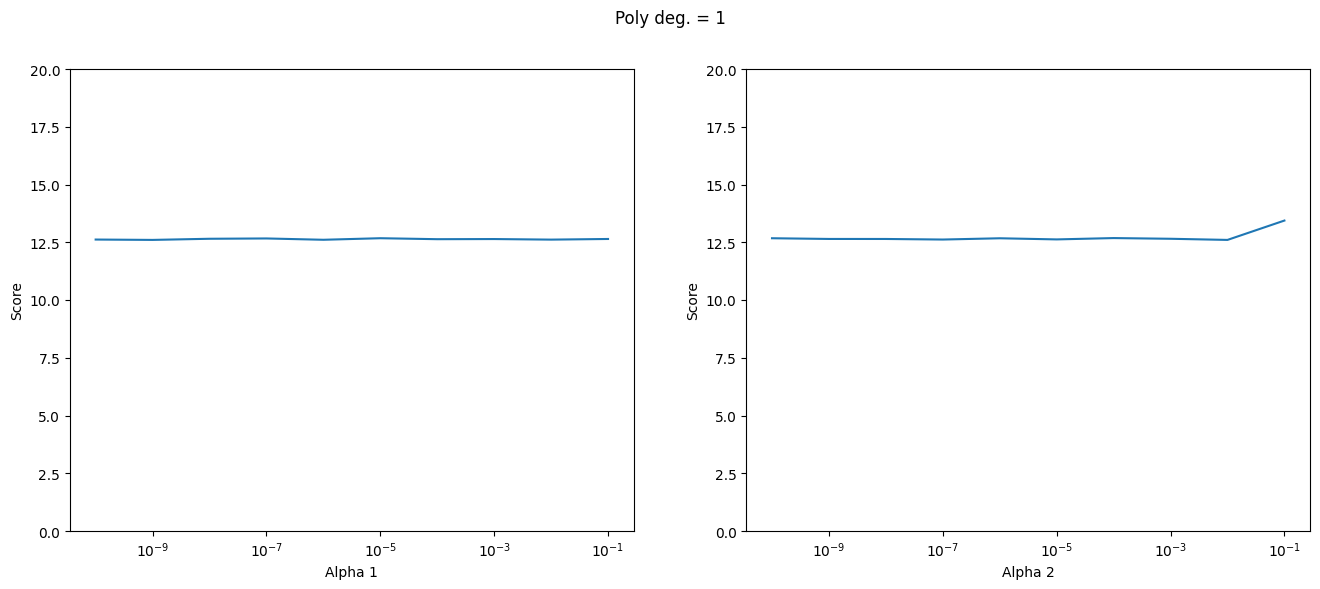

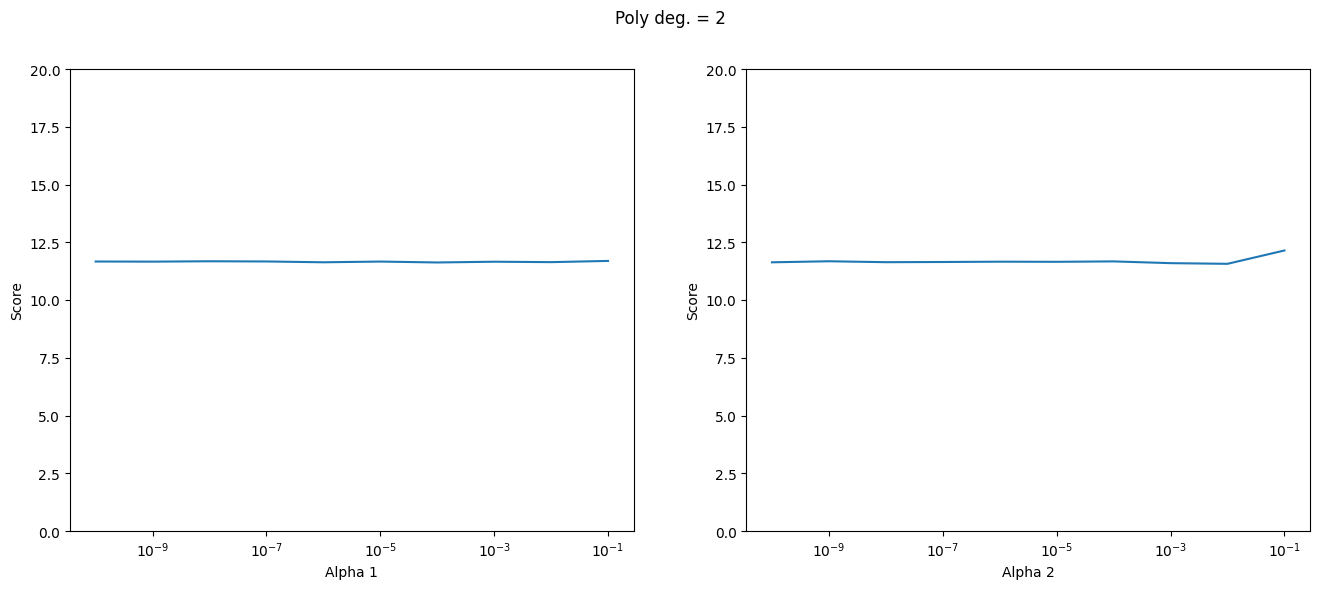

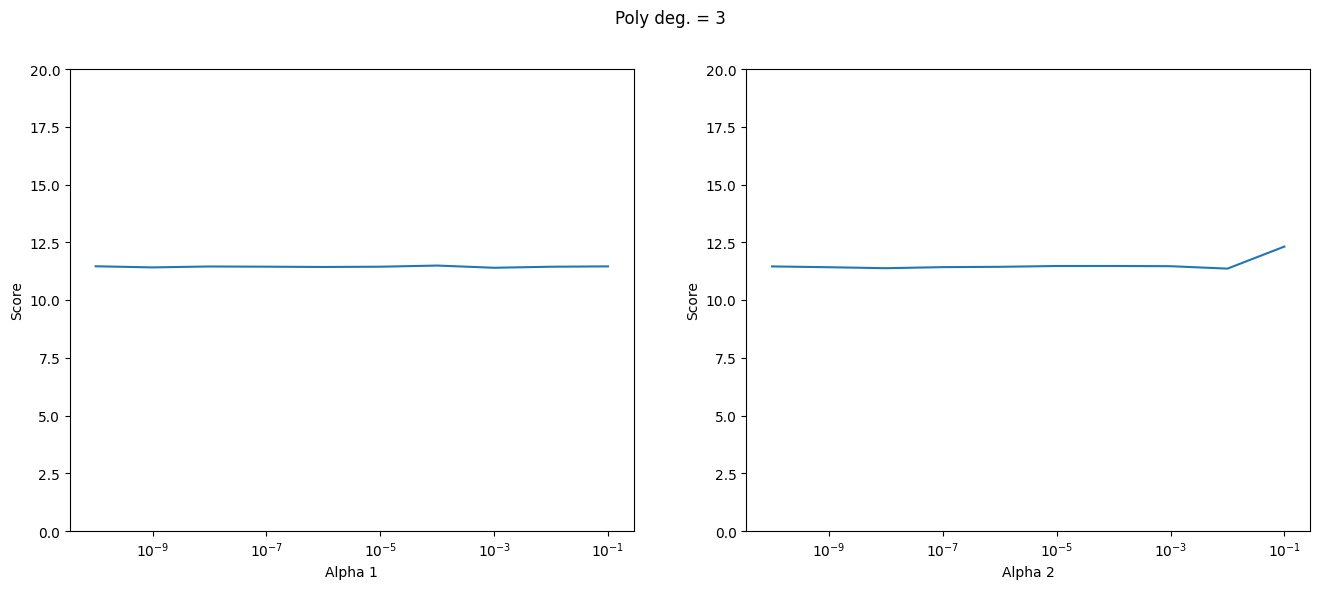

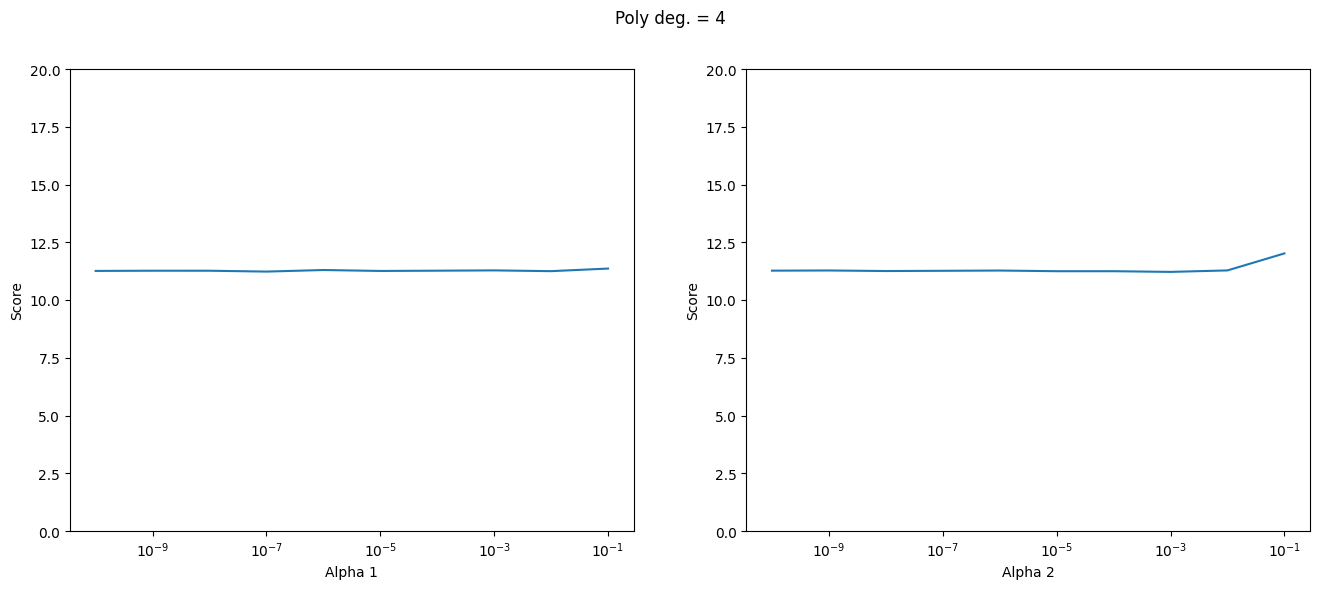

In [344]:

for poly_deg in range(1, 5):
  fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

  fig.suptitle(f'Poly deg. = {poly_deg}')
  ax[0].set_xlabel('Alpha 1')
  ax[0].set_ylabel('Score')
  ax[0].set_xscale('log')
  ax[0].set_ylim([0, 20])


  x = 10 ** np.linspace(-10, -1, 10)
  y = []

  for alpha1 in x:
    reg = PolynomialRegression(alpha1, 0, poly_deg, 0.01, 1024, 1000).fit(x_train, y_train)
    y.append(reg.score(x_test, y_test))

  ax[0].plot(x, y)

  ax[1].set_xlabel('Alpha 2')
  ax[1].set_ylabel('Score')
  ax[1].set_xscale('log')
  ax[1].set_ylim([0, 20])

  x = 10 ** np.linspace(-10, -1, 10)
  y = []

  for alpha2 in x:
    reg = PolynomialRegression(0, alpha2, poly_deg, 0.01, 1024, 1000).fit(x_train, y_train)
    y.append(reg.score(x_test, y_test))


  ax[1].plot(x, y)
  plt.show()

C:\Users\Eugene\AppData\Local\Temp\ipykernel_32084\4015567919.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['']+ticks)
C:\Users\Eugene\AppData\Local\Temp\ipykernel_32084\4015567919.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(['']+ticks)


[Text(0, -1.0, ''),
 Text(0, 0.0, '1e-10'),
 Text(0, 1.0, '1e-9'),
 Text(0, 2.0, '1e-8'),
 Text(0, 3.0, '1e-7'),
 Text(0, 4.0, '1e-6'),
 Text(0, 5.0, '1e-5'),
 Text(0, 6.0, '1e-4'),
 Text(0, 7.0, '1e-3'),
 Text(0, 8.0, '1e-2'),
 Text(0, 9.0, '1e-1'),
 Text(0, 10.0, '')]

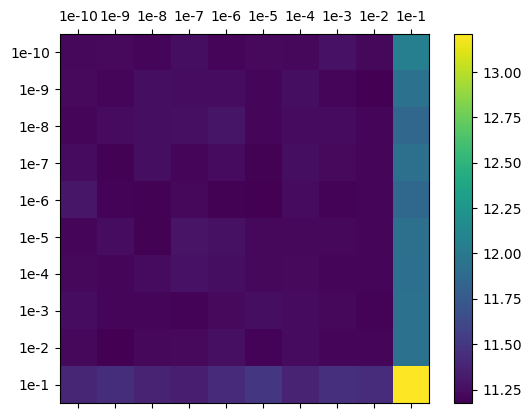

In [345]:
# alpha1 & alpha2 together

x = 10 ** np.linspace(-10, -1, 10)
y = 10 ** np.linspace(-10, -1, 10)

res = []
poly_deg = 5
learning_rate = 0.01
batch_size = 1024
train_steps = 1000

for alpha1 in x:
  row = []
  for alpha2 in y:
    reg = PolynomialRegression(alpha1, alpha2, poly_deg, learning_rate, batch_size, train_steps).fit(x_train, y_train)
    row.append(reg.score(x_test, y_test))
  res.append(row)


ticks = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1"]
 
 
figure = plt.figure()
axes = figure.add_subplot(111)
 
caxes = axes.matshow(res)
figure.colorbar(caxes)

plt.locator_params(nbins=10)

axes.set_xticklabels(['']+ticks)
axes.set_yticklabels(['']+ticks)




Візуалізуйте залежність передбаченої критичної температури від істинної для кращої моделі:

Test MAE: 11.219346605220206


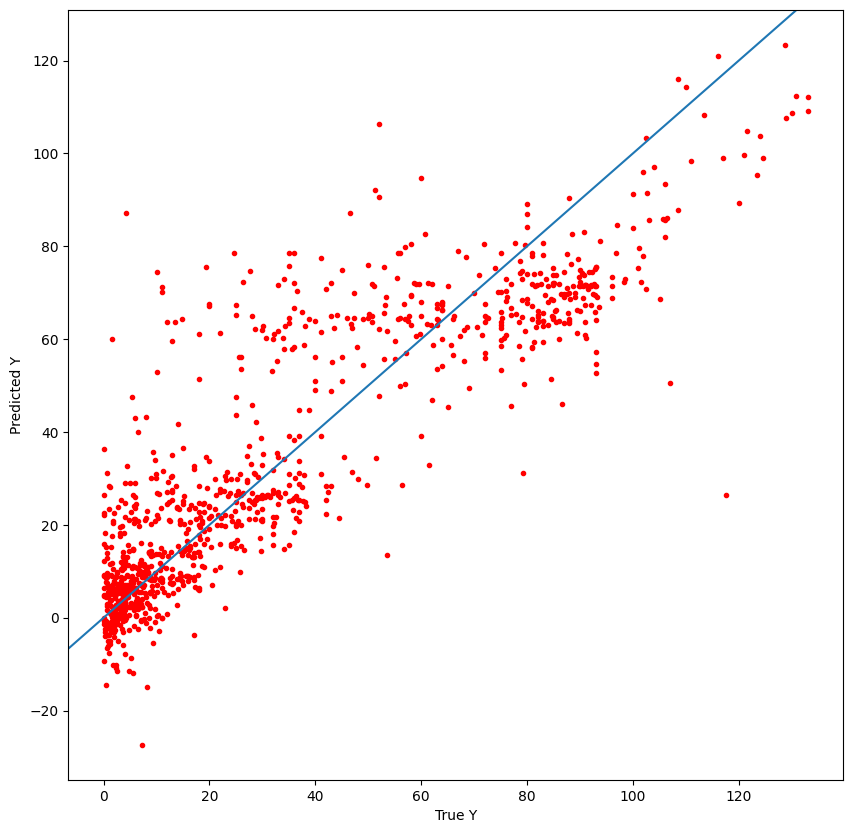

In [347]:
alpha1 = 1e-5
alpha2 = 1e-6
poly_deg = 5
learning_rate = 0.01
batch_size = 1024
train_steps = 1000

reg = PolynomialRegression(alpha1, alpha2, poly_deg, learning_rate, batch_size, train_steps).fit(x_train, y_train)
y_test_pred = reg.predict(x_test)
print(f'Test MAE: {reg.score(x_test, y_test)}')

plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test_pred[:, 0], marker='.', c='r')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.axline((0, 0), (1, 1))
plt.show()